In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors, rcParams

import bayesmark.constants as cc
import bayesmark.xr_util as xru
from bayesmark.serialize import XRSerializer
from bayesmark.constants import ITER, METHOD, ARG_DELIM, OBJECTIVE, VISIBLE_TO_OPT
from bayesmark.path_util import abspath
from bayesmark.util import preimage_func

In [6]:
# User settings, must specify location of the data to make plots here for this to run
DB_ROOT = abspath("/mnt/workspace/output")
DBID = "run_20200928_190455"
metric_for_scoring = VISIBLE_TO_OPT

In [7]:
# Matplotlib setup
# Note this will put type-3 font BS in the pdfs, if it matters
rcParams["mathtext.fontset"] = "stix"
rcParams["font.family"] = "STIXGeneral"

In [8]:
def build_color_dict(names):
    """Make a color dictionary to give each name a mpl color.
    """
    norm = colors.Normalize(vmin=0, vmax=1)
    m = cm.ScalarMappable(norm, cm.tab20)
    color_dict = m.to_rgba(np.linspace(0, 1, len(names)))
    color_dict = dict(zip(names, color_dict))
    return color_dict

In [9]:
# Load the data
summary_ds, meta = XRSerializer.load_derived(DB_ROOT, db=DBID, key=cc.MEAN_SCORE)

In [10]:
method_to_rgba = build_color_dict(summary_ds.coords[METHOD].values.tolist())

In [11]:
# Group methods by the package behind them
method_only = lambda method_rev: method_rev.split(ARG_DELIM, 1)[0]
groups = preimage_func(method_only, summary_ds.coords[METHOD].values)

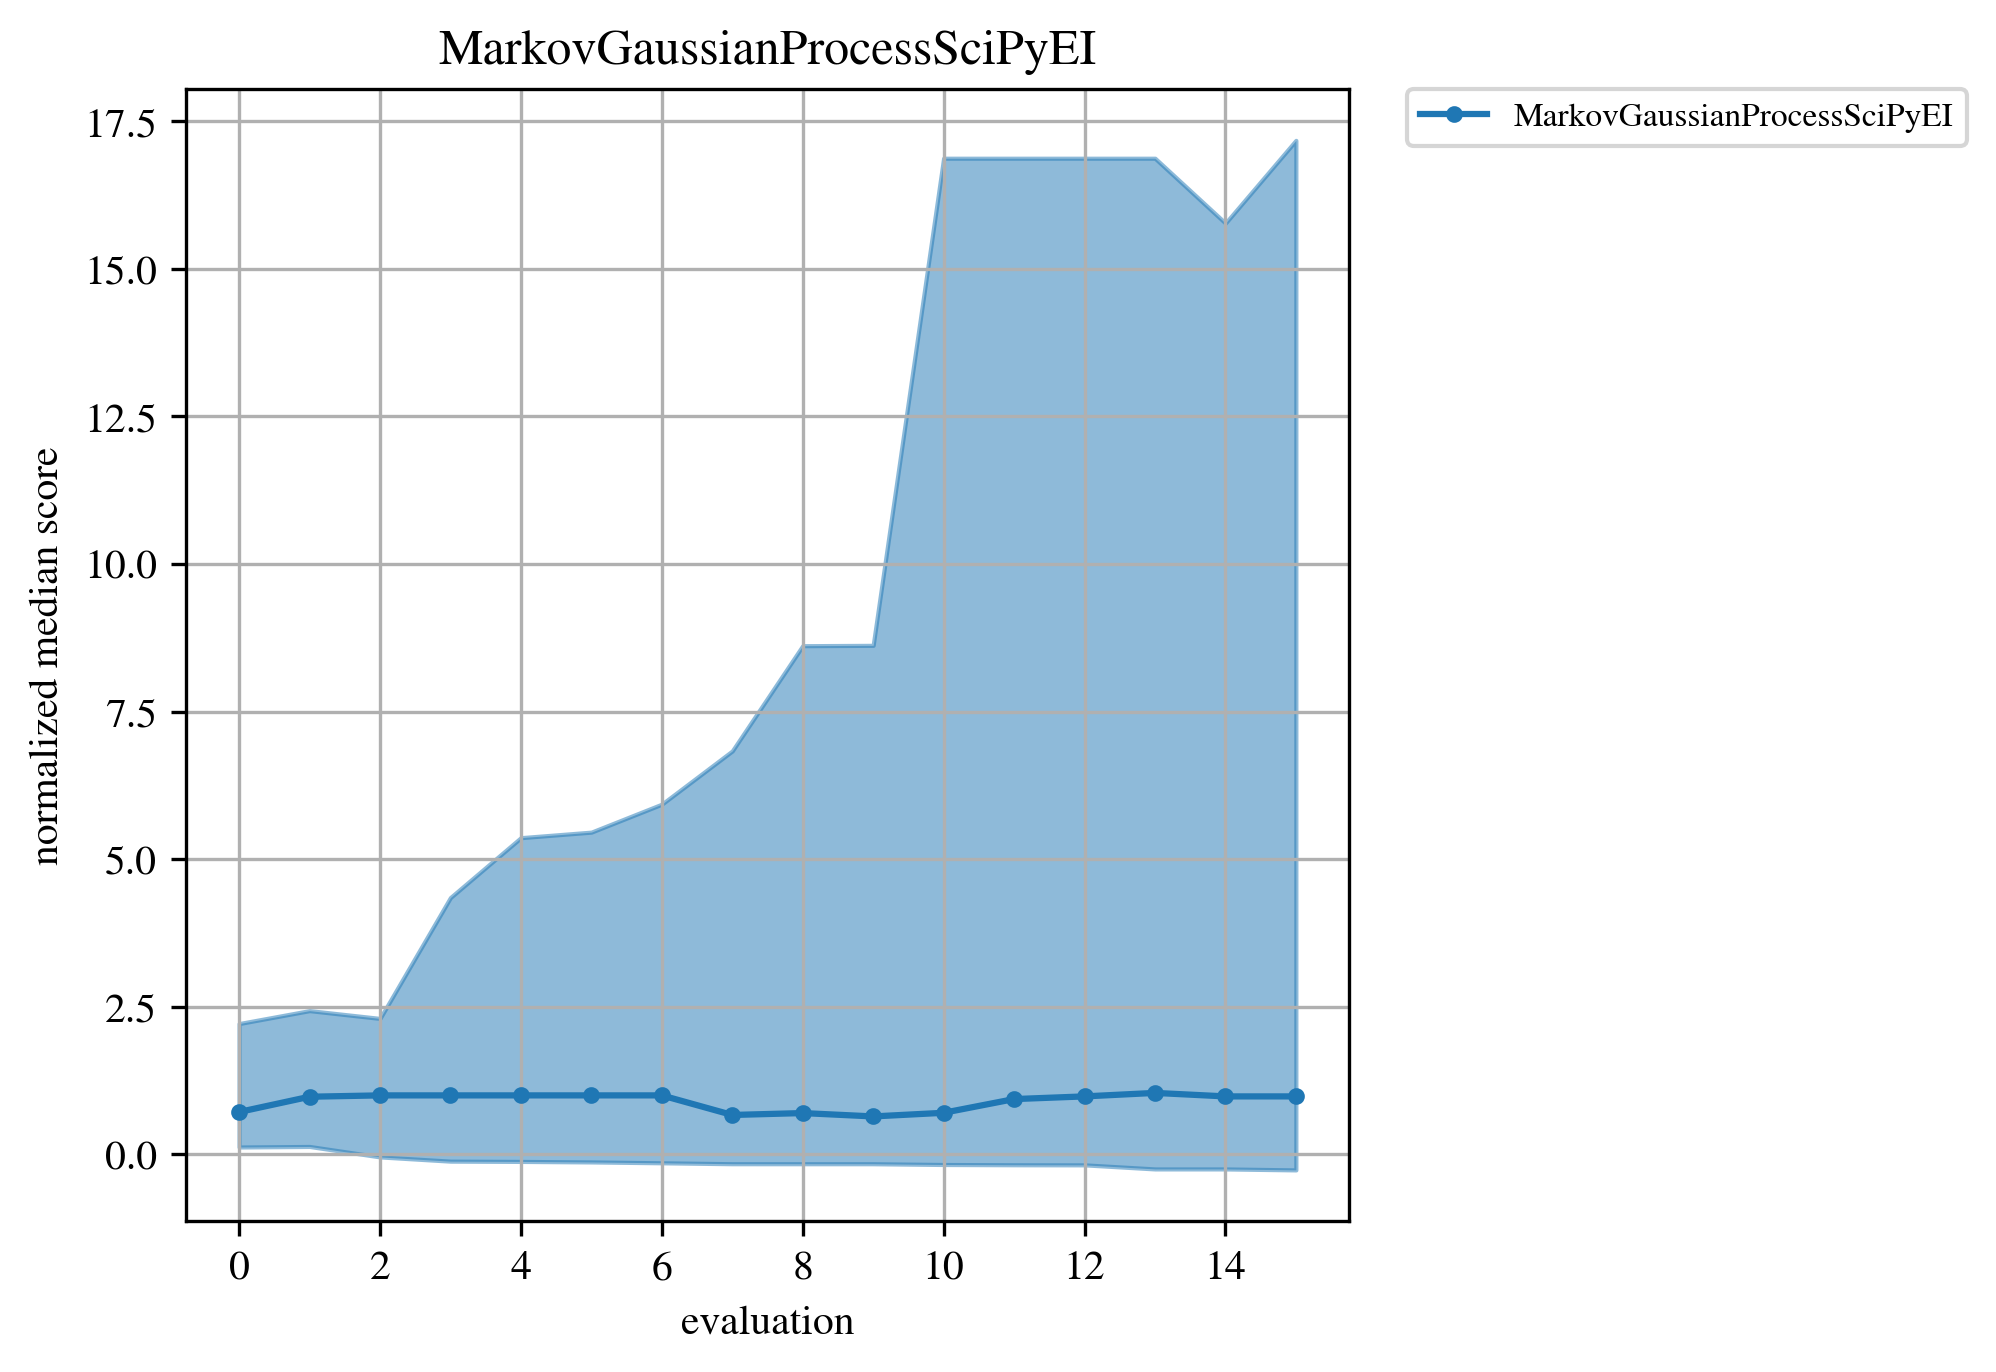

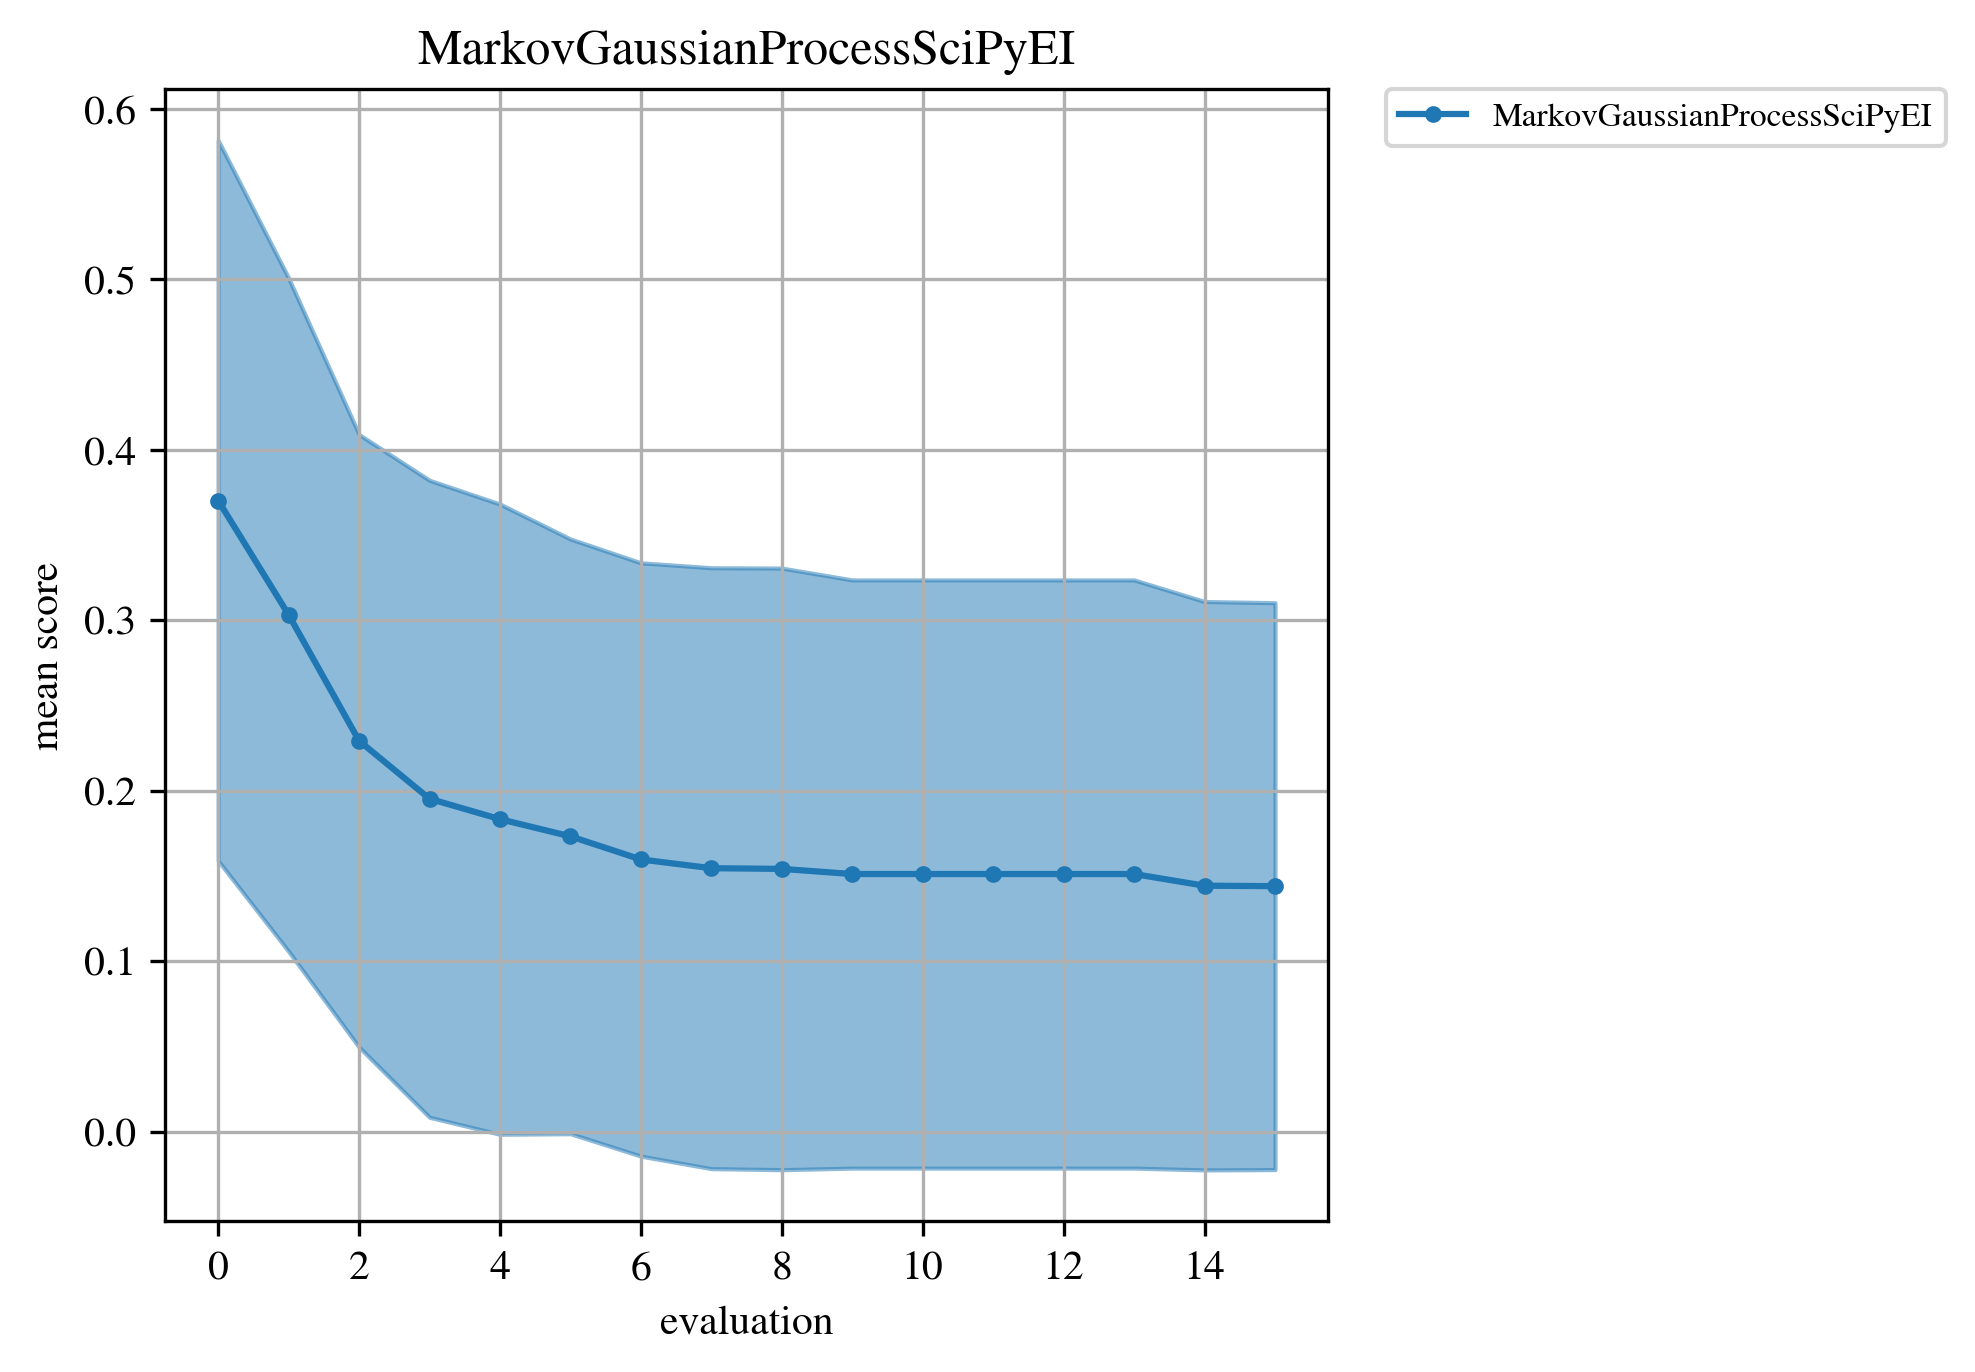

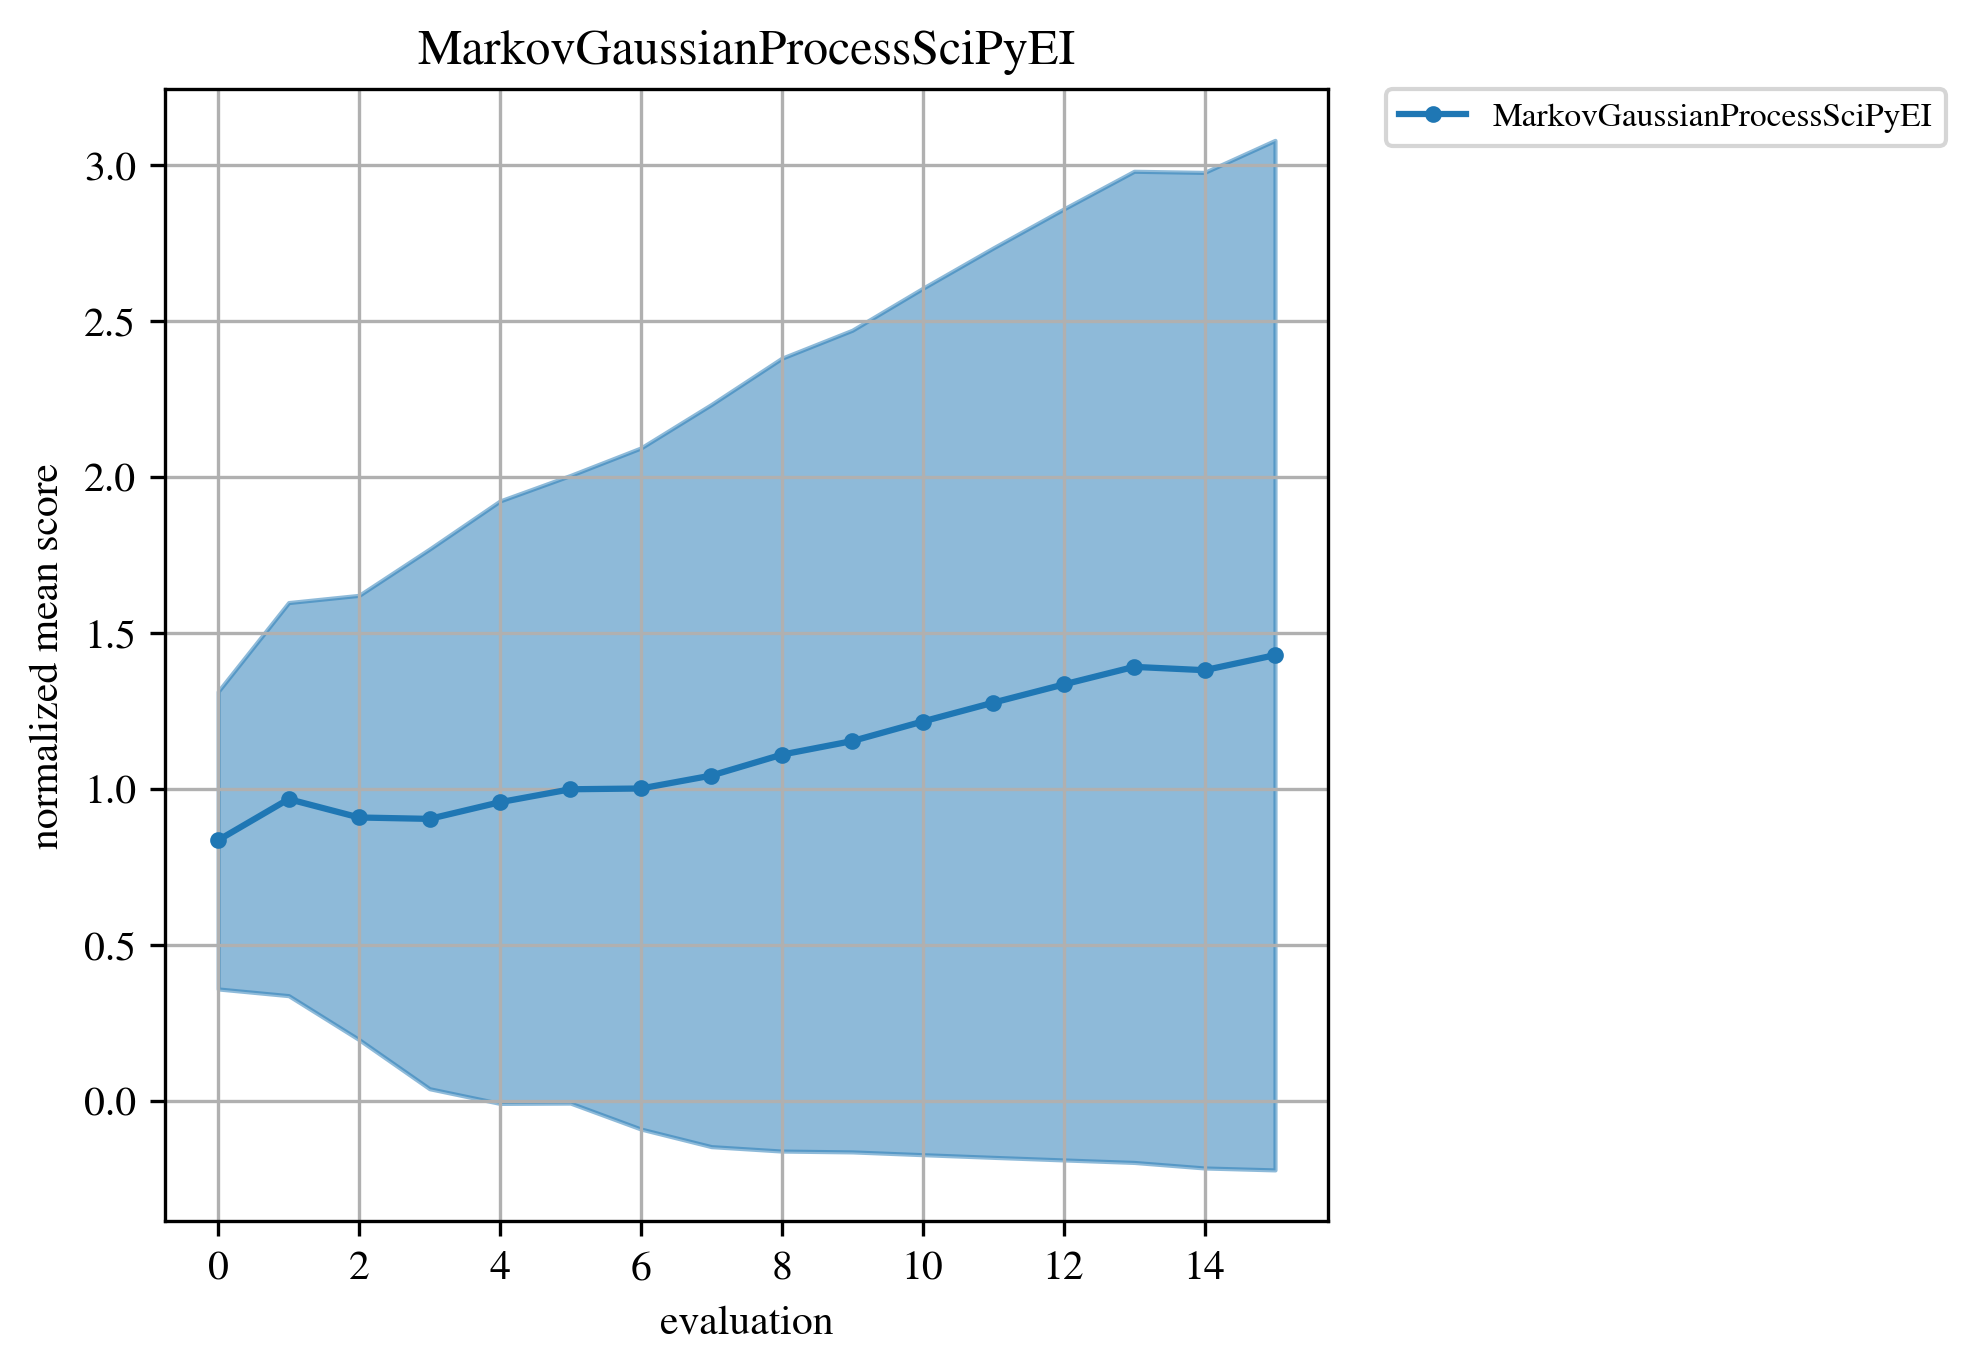

In [12]:
# Make a plot for each package
for method_name in groups:
    plt.figure(figsize=(5, 5), dpi=300)
    for method_ver_name in groups[method_name]:
        curr_ds = summary_ds.sel({METHOD: method_ver_name, OBJECTIVE: metric_for_scoring})
        curr_ds.coords[ITER].values

        plt.fill_between(
            curr_ds.coords[ITER].values,
            curr_ds[cc.LB_MED].values,
            curr_ds[cc.UB_MED].values,
            color=method_to_rgba[method_ver_name],
            alpha=0.5,
        )
        plt.plot(
            curr_ds.coords[ITER].values,
            curr_ds[cc.PERF_MED].values,
            color=method_to_rgba[method_ver_name],
            label=method_name,
            marker=".",
        )
    plt.xlabel("evaluation", fontsize=10)
    plt.ylabel("normalized median score", fontsize=10)
    plt.title(method_name)
    plt.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.grid()

    plt.figure(figsize=(5, 5), dpi=300)
    for method_ver_name in groups[method_name]:
        curr_ds = summary_ds.sel({METHOD: method_ver_name, OBJECTIVE: metric_for_scoring})
        curr_ds.coords[ITER].values

        plt.fill_between(
            curr_ds.coords[ITER].values,
            curr_ds[cc.LB_MEAN].values,
            curr_ds[cc.UB_MEAN].values,
            color=method_to_rgba[method_ver_name],
            alpha=0.5,
        )
        plt.plot(
            curr_ds.coords[ITER].values,
            curr_ds[cc.PERF_MEAN].values,
            color=method_to_rgba[method_ver_name],
            label=method_name,
            marker=".",
        )
    plt.xlabel("evaluation", fontsize=10)
    plt.ylabel("mean score", fontsize=10)
    plt.title(method_name)
    plt.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.grid()

    plt.figure(figsize=(5, 5), dpi=300)
    for method_ver_name in groups[method_name]:
        curr_ds = summary_ds.sel({METHOD: method_ver_name, OBJECTIVE: metric_for_scoring})
        curr_ds.coords[ITER].values

        plt.fill_between(
            curr_ds.coords[ITER].values,
            curr_ds[cc.LB_NORMED_MEAN].values,
            curr_ds[cc.UB_NORMED_MEAN].values,
            color=method_to_rgba[method_ver_name],
            alpha=0.5,
        )
        plt.plot(
            curr_ds.coords[ITER].values,
            curr_ds[cc.NORMED_MEAN].values,
            color=method_to_rgba[method_ver_name],
            label=method_name,
            marker=".",
        )
    plt.xlabel("evaluation", fontsize=10)
    plt.ylabel("normalized mean score", fontsize=10)
    plt.title(method_name)
    plt.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.grid()

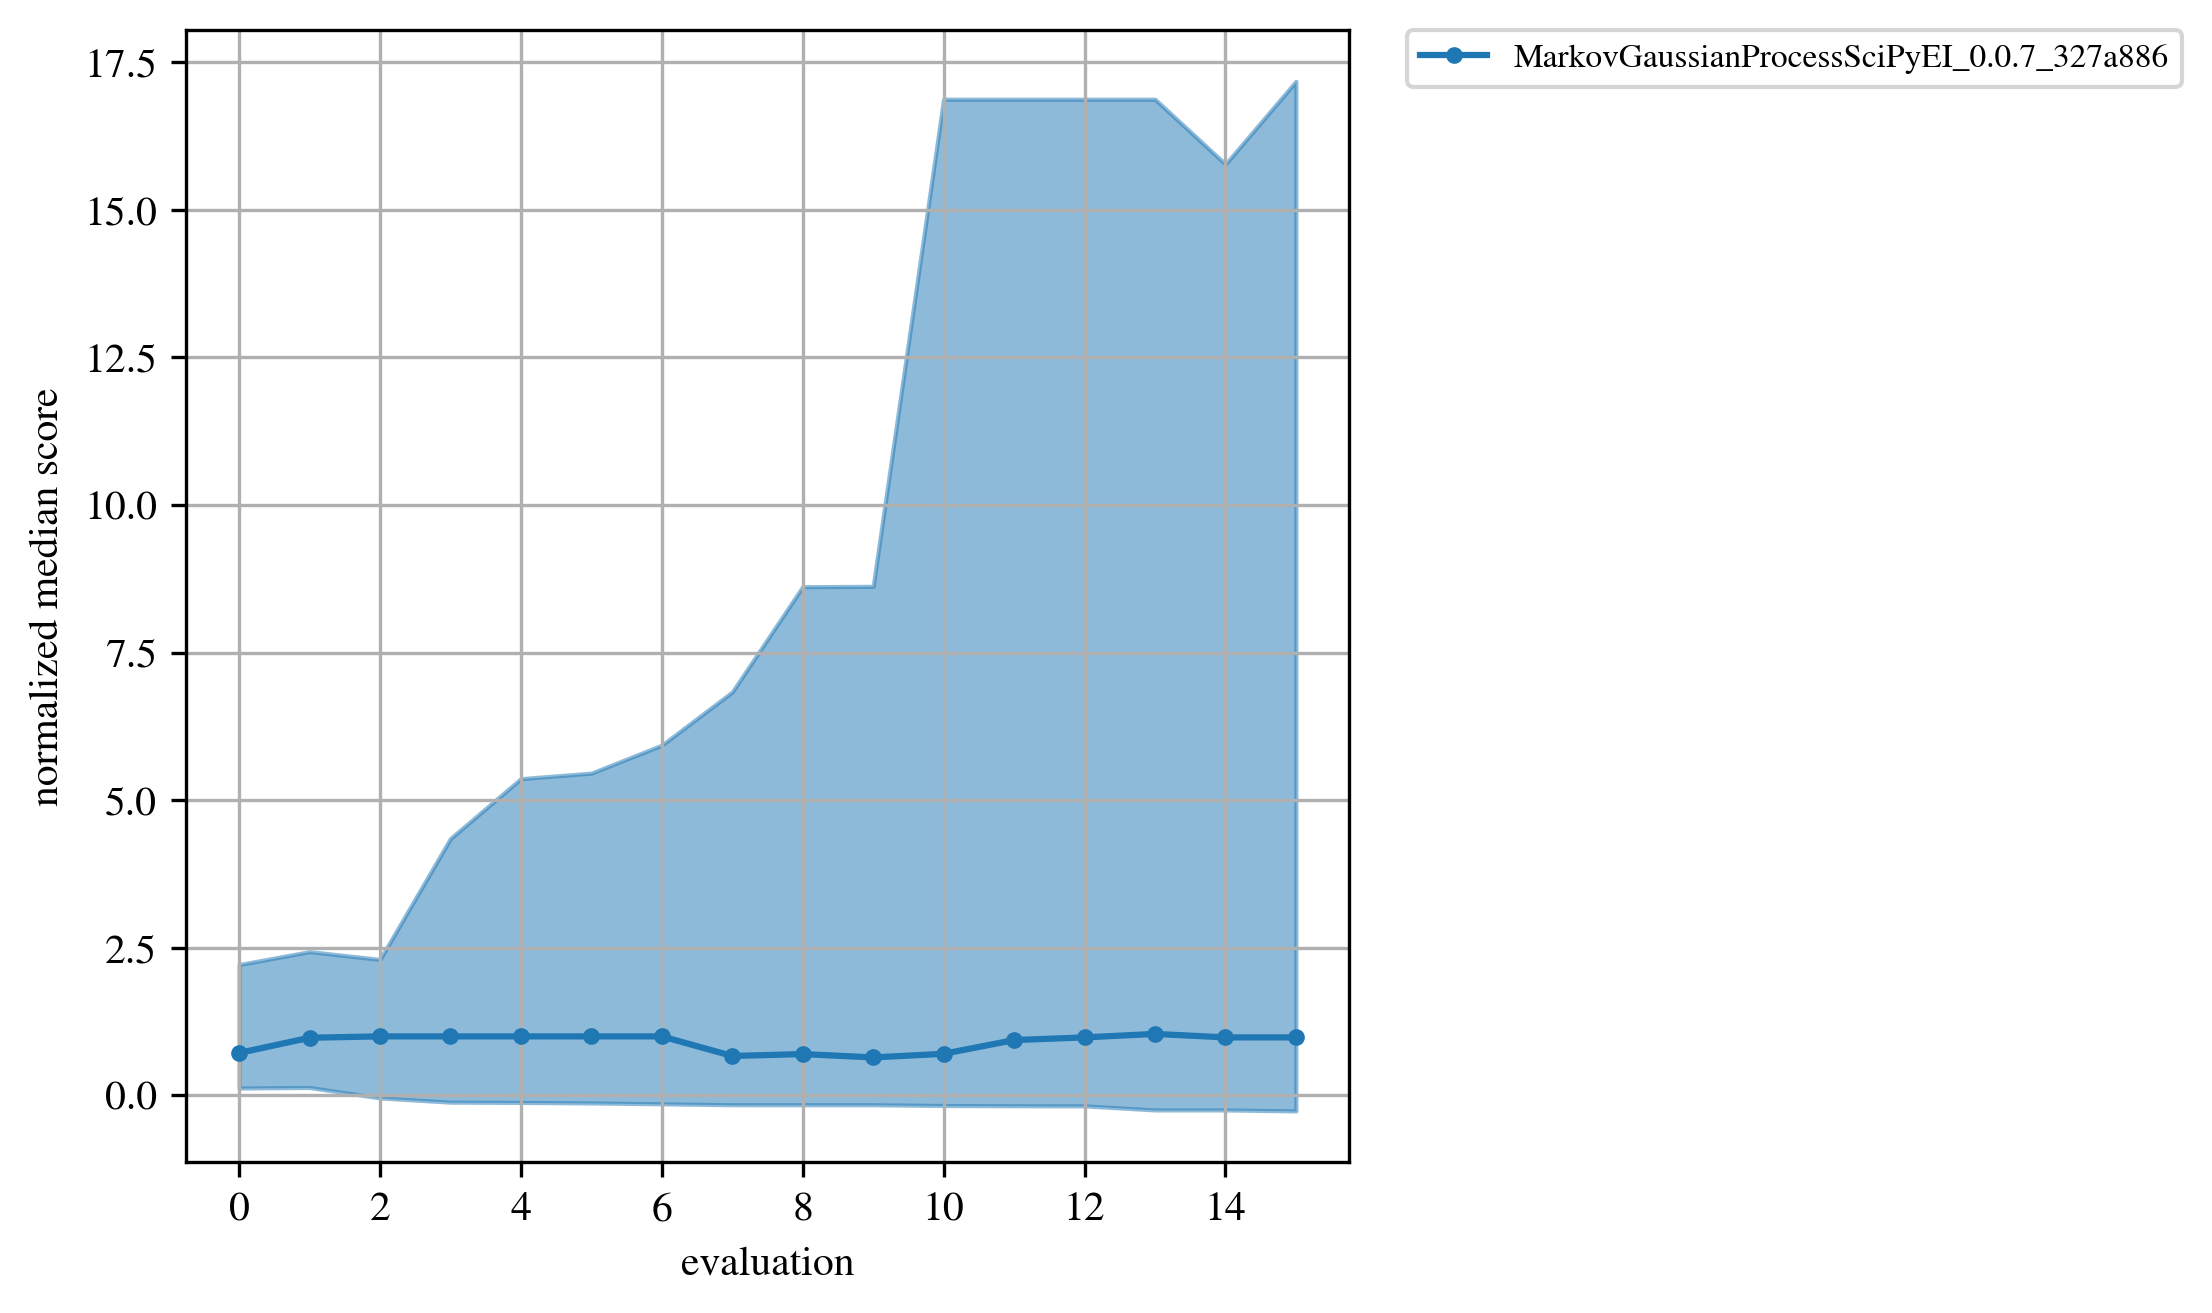

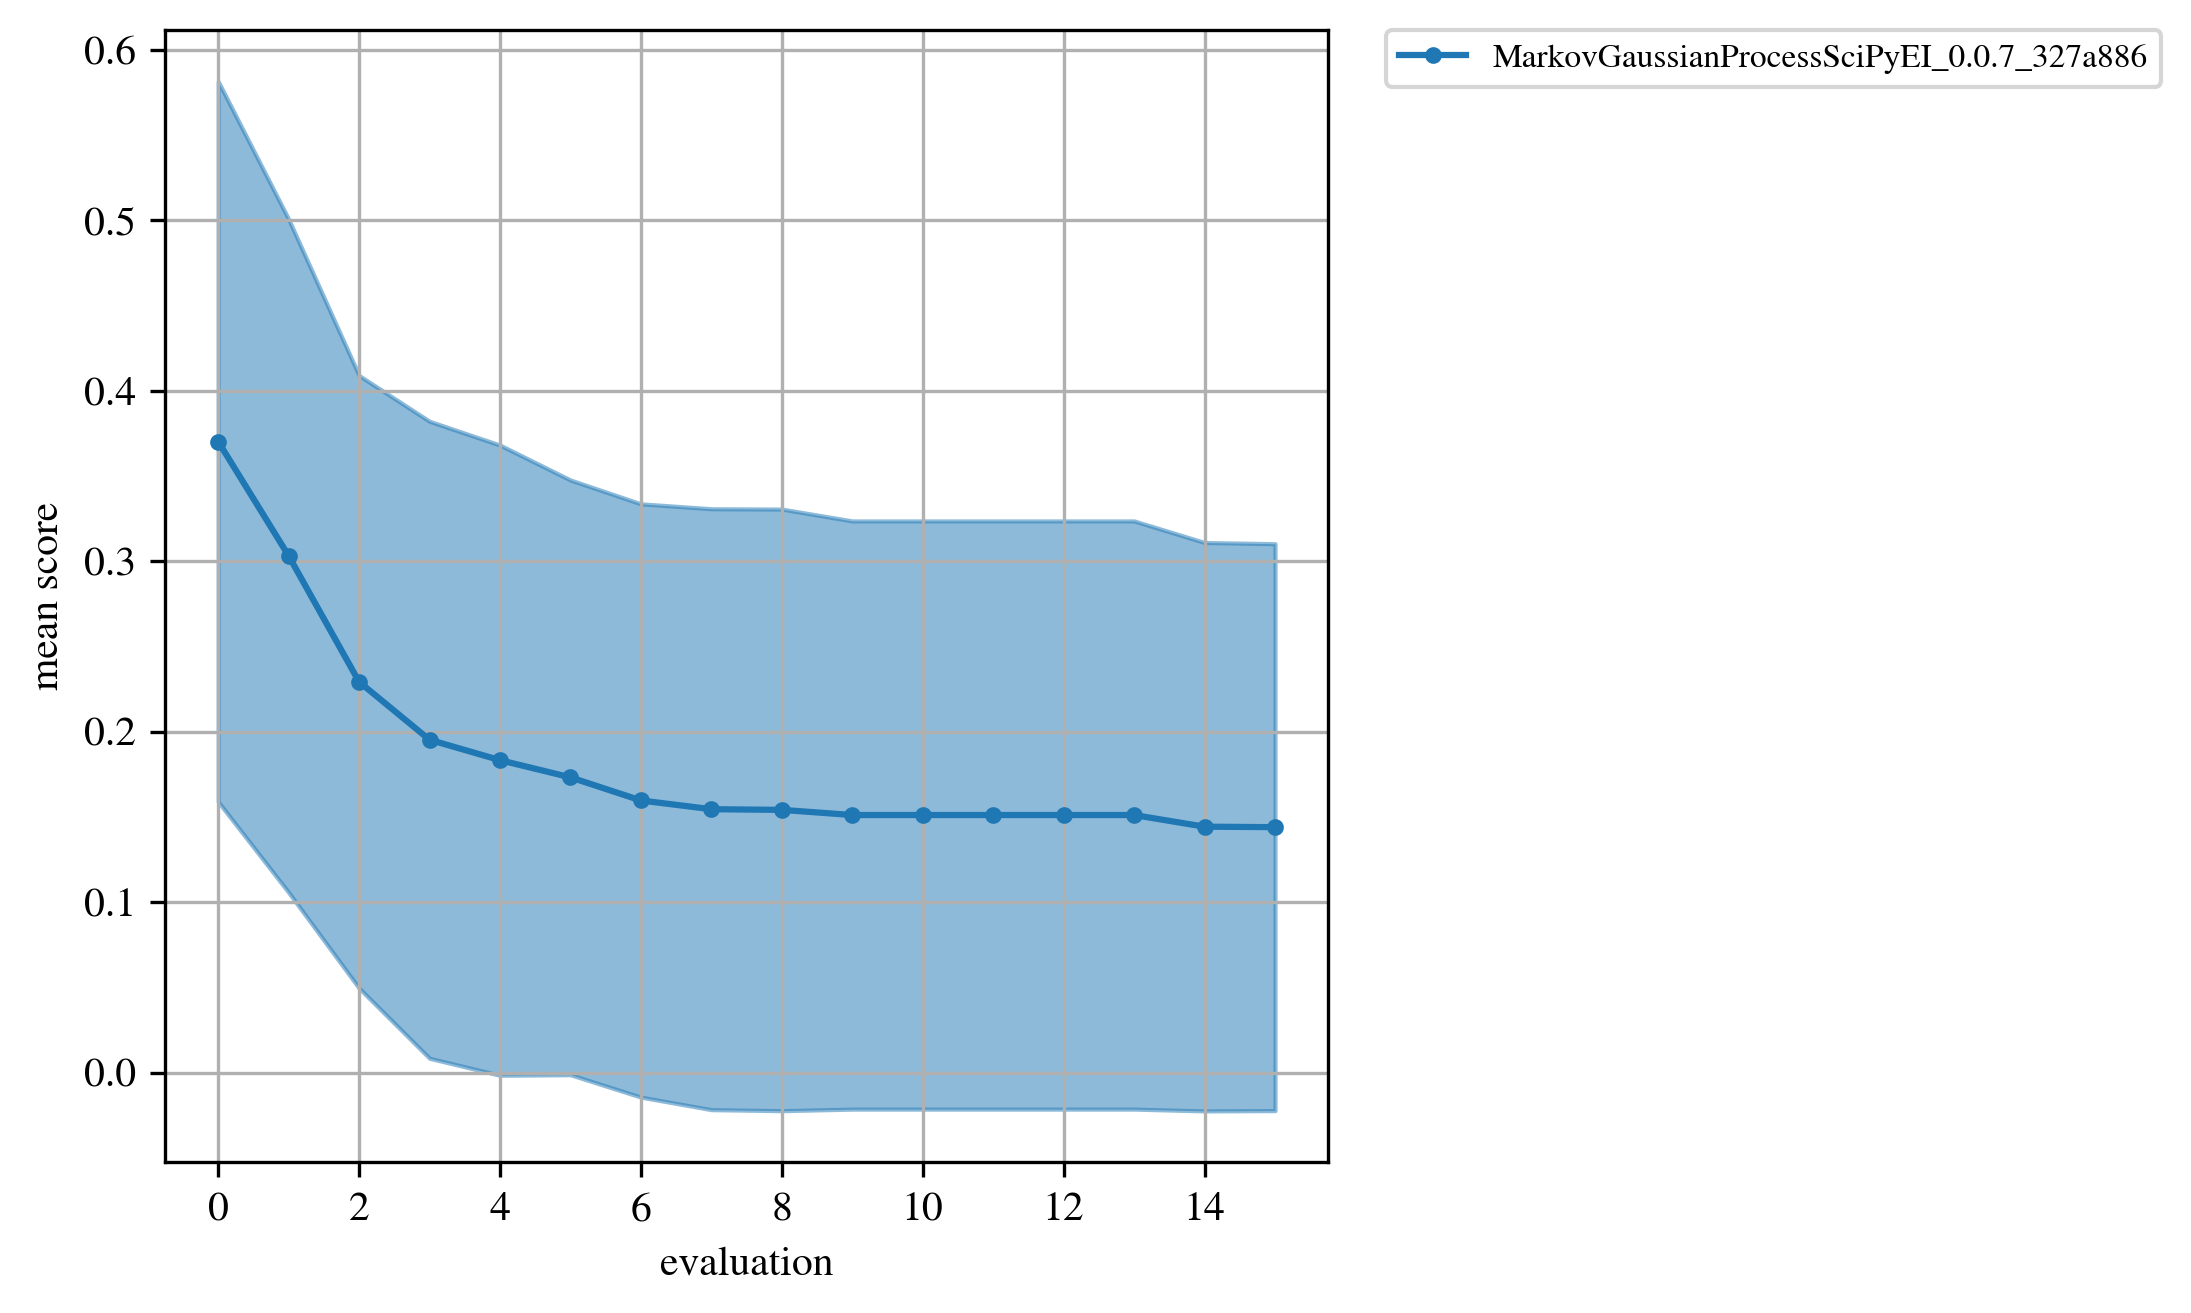

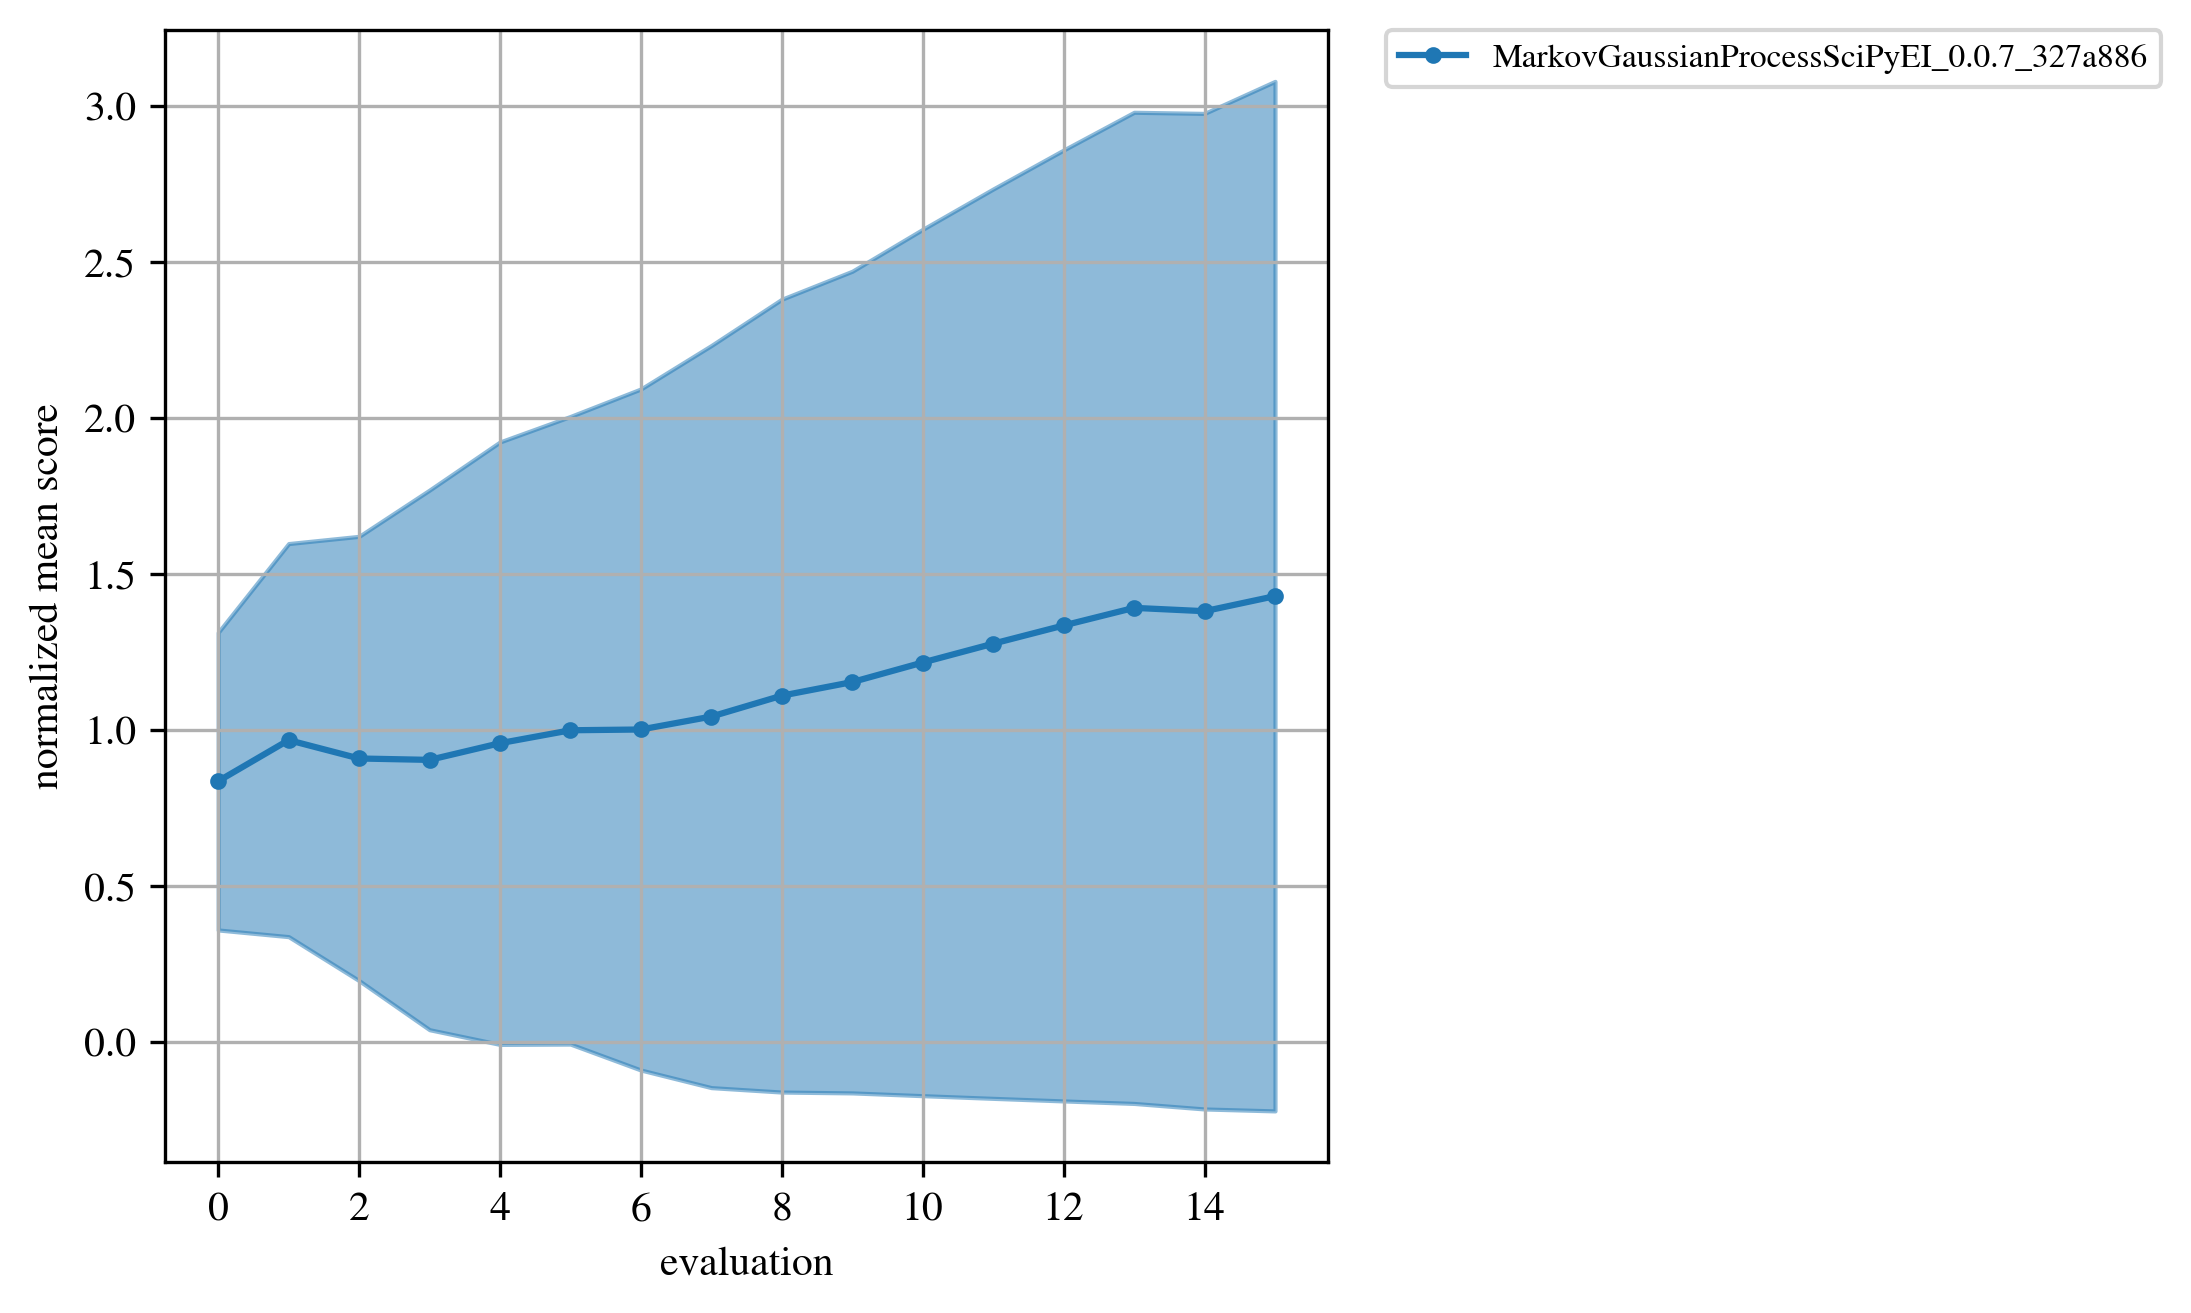

In [13]:
# Make the summary plot
plt.figure(figsize=(5, 5), dpi=300)
for method_ver_name in summary_ds.coords[METHOD].values:
    curr_ds = summary_ds.sel({METHOD: method_ver_name, OBJECTIVE: metric_for_scoring})
    curr_ds.coords[ITER].values

    plt.fill_between(
        curr_ds.coords[ITER].values,
        curr_ds[cc.LB_MED].values,
        curr_ds[cc.UB_MED].values,
        color=method_to_rgba[method_ver_name],
        alpha=0.5,
    )
    plt.plot(
        curr_ds.coords[ITER].values,
        curr_ds[cc.PERF_MED].values,
        color=method_to_rgba[method_ver_name],
        label=method_ver_name,
        marker=".",
    )
plt.xlabel("evaluation", fontsize=10)
plt.ylabel("normalized median score", fontsize=10)
plt.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.grid()

plt.figure(figsize=(5, 5), dpi=300)
for method_ver_name in summary_ds.coords[METHOD].values:
    curr_ds = summary_ds.sel({METHOD: method_ver_name, OBJECTIVE: metric_for_scoring})
    curr_ds.coords[ITER].values

    plt.fill_between(
        curr_ds.coords[ITER].values,
        curr_ds[cc.LB_MEAN].values,
        curr_ds[cc.UB_MEAN].values,
        color=method_to_rgba[method_ver_name],
        alpha=0.5,
    )
    plt.plot(
        curr_ds.coords[ITER].values,
        curr_ds[cc.PERF_MEAN].values,
        color=method_to_rgba[method_ver_name],
        label=method_ver_name,
        marker=".",
    )
plt.xlabel("evaluation", fontsize=10)
plt.ylabel("mean score", fontsize=10)
plt.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.grid()

plt.figure(figsize=(5, 5), dpi=300)
for method_ver_name in summary_ds.coords[METHOD].values:
    curr_ds = summary_ds.sel({METHOD: method_ver_name, OBJECTIVE: metric_for_scoring})
    curr_ds.coords[ITER].values

    plt.fill_between(
        curr_ds.coords[ITER].values,
        curr_ds[cc.LB_NORMED_MEAN].values,
        curr_ds[cc.UB_NORMED_MEAN].values,
        color=method_to_rgba[method_ver_name],
        alpha=0.5,
    )
    plt.plot(
        curr_ds.coords[ITER].values,
        curr_ds[cc.NORMED_MEAN].values,
        color=method_to_rgba[method_ver_name],
        label=method_ver_name,
        marker=".",
    )
plt.xlabel("evaluation", fontsize=10)
plt.ylabel("normalized mean score", fontsize=10)
plt.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.grid()